| **Inicio** | **atrás 18** | **Siguiente 20** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./18_Distribucion_de_Datos.ipynb)| [⏩](./20_Medidas_de_Centralidad.ipynb)|

# **19. Las 5 Técnicas de Muestreo que debes conocer: Un ejemplo con Python**

## **Introducción**

**1. Muestreo Aleatorio Simple:**

En el muestreo aleatorio simple, cada individuo de la población tiene la misma probabilidad de ser seleccionado para la muestra.

**Ejemplo:**

Supongamos que tenemos una población de 100 estudiantes y queremos seleccionar una muestra aleatoria simple de tamaño 20.

In [1]:
import numpy as np

# Población de estudiantes
population = np.arange(1, 101)

# Tamaño de la muestra
sample_size = 20

# Muestreo aleatorio simple
random_sample = np.random.choice(population, size=sample_size, replace=False)
print(random_sample)

[26  3 99 35 55 90 34 98 82 11 18 81 20 38 23 84 64 61 58 72]


**2. Muestreo Estratificado:**

En el muestreo estratificado, la población se divide en estratos o grupos, y luego se selecciona una muestra aleatoria de cada estrato.

**Ejemplo:**

Supongamos que tenemos una población de estudiantes y queremos seleccionar una muestra estratificada de tamaño 30, con 10 estudiantes de cada grado (estrato).

In [2]:
# Población de estudiantes y sus grados
population = np.arange(1, 101)
grades = np.repeat([1, 2, 3], [40, 30, 30])

# Tamaño de la muestra estratificada
sample_size = 30

# Muestreo estratificado
strata = np.unique(grades)
stratified_sample = []
for s in strata:
    stratum_population = population[grades == s]
    stratum_sample = np.random.choice(stratum_population, size=sample_size // len(strata), replace=False)
    stratified_sample.extend(stratum_sample)
print(stratified_sample)

[23, 15, 35, 9, 11, 17, 14, 27, 5, 6, 46, 51, 50, 70, 59, 53, 48, 44, 52, 64, 92, 81, 100, 85, 75, 88, 82, 96, 86, 94]


**3. Muestreo Sistemático:**

En el muestreo sistemático, se selecciona cada k-ésimo elemento de la población después de ordenarla.

**Ejemplo:**

Supongamos que tenemos una población de 100 estudiantes y queremos seleccionar una muestra sistemática de tamaño 20.

In [3]:
# Población de estudiantes
population = np.arange(1, 101)

# Tamaño de la muestra
sample_size = 20

# Paso para seleccionar sistemáticamente
step = len(population) // sample_size

# Muestreo sistemático
systematic_sample = population[::step]
print(systematic_sample)

[ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86 91 96]


**4. Muestreo por Conglomerados:**

En el muestreo por conglomerados, la población se divide en conglomerados (grupos) y se seleccionan algunos conglomerados al azar. Luego, se toma una muestra de cada conglomerado seleccionado.

**Ejemplo:**

Supongamos que tenemos una población de estudiantes y queremos seleccionar una muestra por conglomerados, eligiendo dos grados al azar y luego seleccionando tres estudiantes de cada grado.

In [4]:
# Población de estudiantes y sus grados
population = np.arange(1, 101)
grades = np.repeat([1, 2, 3], [40, 30, 30])

# Número de conglomerados a seleccionar
num_clusters = 2

# Muestreo por conglomerados
cluster_indices = np.random.choice(np.unique(grades), size=num_clusters, replace=False)
cluster_sample = []
for cluster in cluster_indices:
    cluster_population = population[grades == cluster]
    cluster_stratum_sample = np.random.choice(cluster_population, size=3, replace=False)
    cluster_sample.extend(cluster_stratum_sample)
print(cluster_sample)

[51, 63, 49, 3, 15, 12]


**5. Muestreo Estratificado Proporcional:**

Similar al muestreo estratificado, pero se selecciona una cantidad proporcional de muestras de cada estrato en función de su tamaño en la población.

**Ejemplo:**

Usando el mismo ejemplo que el muestreo estratificado, vamos a realizar un muestreo estratificado proporcional.

In [6]:
import numpy as np

# Población de estudiantes y sus grados
population = np.arange(1, 101)
grades = np.repeat([1, 2, 3], [40, 30, 30])

# Tamaño de la muestra estratificada
sample_size = 30

# Calcular las proporciones de cada estrato
strata_proportions = np.bincount(grades) / len(grades)

# Inicializar la muestra estratificada proporcional
stratified_proportional_sample = []

# Realizar el muestreo estratificado proporcional
for s, proportion in enumerate(strata_proportions):
    stratum_population = population[grades == s + 1]
    stratum_sample_size = int(proportion * sample_size)
    
    # Verificar si hay suficientes elementos en el estrato para el tamaño de la muestra
    if len(stratum_population) >= stratum_sample_size:
        stratum_sample = np.random.choice(stratum_population, size=stratum_sample_size, replace=False)
    else:
        stratum_sample = stratum_population  # Tomar todos los elementos disponibles
    
    stratified_proportional_sample.extend(stratum_sample)

print(stratified_proportional_sample)

[69, 55, 52, 70, 54, 49, 51, 53, 59, 46, 57, 47, 89, 100, 75, 82, 93, 76, 80, 71, 85]


**Conclusiones:**

Cada técnica de muestreo tiene su propio propósito y aplicabilidad en diferentes situaciones.
La elección de la técnica de muestreo depende de la población, los objetivos del estudio y las limitaciones.
En todos los ejemplos, los datos generados representan diferentes métodos de selección de muestras de una población y pueden usarse para análisis posteriores.
Recuerda que en situaciones del mundo real, elegir la técnica de muestreo adecuada es fundamental para obtener resultados confiables y representativos.

## **Muestreo por Conveniencia**

El muestreo por conveniencia es una técnica de selección de muestra en la que los elementos se eligen de manera conveniente y accesible, en lugar de seguir un proceso de selección aleatorio o sistemático. Aunque puede ser rápido y fácil de implementar, este método puede introducir sesgos y no garantiza que la muestra sea representativa de la población. Aquí tienes una explicación detallada y un ejemplo con gráficos.

**Explicación:**

El muestreo por conveniencia implica seleccionar los elementos más accesibles o disponibles para formar una muestra. Esto puede incluir la selección de personas que están cerca, disponibles en un momento determinado o que son fáciles de acceder. Sin embargo, este método puede introducir sesgos ya que no todos los elementos tienen la misma probabilidad de ser seleccionados, lo que afecta la representatividad de la muestra.

**Ejemplo:**

Supongamos que estás realizando un estudio sobre el uso de redes sociales entre estudiantes universitarios. Para recopilar datos, decides entrevistar a los estudiantes que conoces personalmente y que están disponibles en tu campus universitario. Esto sería un ejemplo de muestreo por conveniencia.

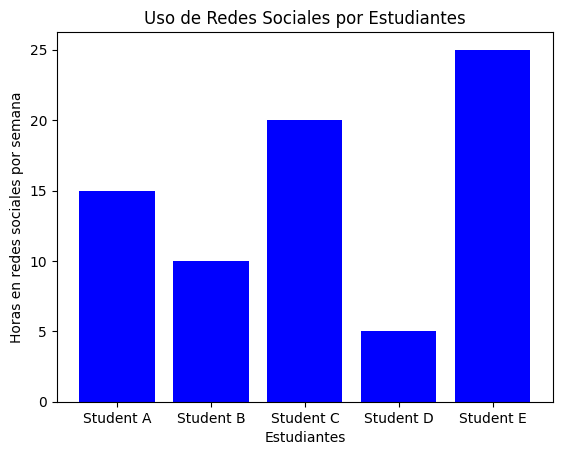

In [7]:
import matplotlib.pyplot as plt

# Datos de ejemplo (uso de redes sociales en horas por semana)
students = ['Student A', 'Student B', 'Student C', 'Student D', 'Student E']
hours_social_media = [15, 10, 20, 5, 25]

# Crear un gráfico de barras para visualizar los datos
plt.bar(students, hours_social_media, color='blue')
plt.xlabel('Estudiantes')
plt.ylabel('Horas en redes sociales por semana')
plt.title('Uso de Redes Sociales por Estudiantes')
plt.show()

**Interpretación del Gráfico:**

En este gráfico, los datos representan el uso de redes sociales en horas por semana para cinco estudiantes. Sin embargo, estos datos se recopilaron utilizando el muestreo por conveniencia, lo que significa que los estudiantes se eligieron según su disponibilidad y proximidad al investigador. Esto podría introducir sesgos y no reflejar necesariamente el comportamiento de todos los estudiantes universitarios.

**Usos y Consideraciones:**

- El muestreo por conveniencia es útil cuando se necesita información rápida y accesible, como en encuestas informales.
- Sin embargo, los resultados pueden ser sesgados y no generalizables a una población más amplia.
- En investigaciones formales o científicas, se deben preferir técnicas de muestreo aleatorio para asegurar la representatividad y minimizar sesgos.

En resumen, el muestreo por conveniencia es una técnica rápida pero no rigurosa para seleccionar una muestra. Aunque puede ser adecuada en ciertas situaciones, es importante comprender sus limitaciones y considerar técnicas más robustas cuando se requiere una representación precisa de la población.

## **Muestreo Aleatorio Simple**

El muestreo aleatorio simple es una técnica de selección de muestra en la que cada elemento de la población tiene la misma probabilidad de ser seleccionado para formar parte de la muestra. Esta técnica garantiza que la muestra resultante sea representativa de la población y reduce la posibilidad de sesgo en los resultados. Aquí tienes una explicación detallada y un ejemplo con gráficos.

**Explicación:**

En el muestreo aleatorio simple, cada elemento de la población tiene una probabilidad igual de ser seleccionado. Esto significa que cada combinación de elementos tiene la misma posibilidad de ser una muestra. Para implementar esta técnica, se puede utilizar un generador de números aleatorios para seleccionar los elementos de la población.

**Ejemplo:**

Supongamos que tienes una población de estudiantes universitarios (100 en total) y deseas seleccionar una muestra aleatoria simple de 20 estudiantes para realizar una encuesta sobre sus hábitos de estudio.

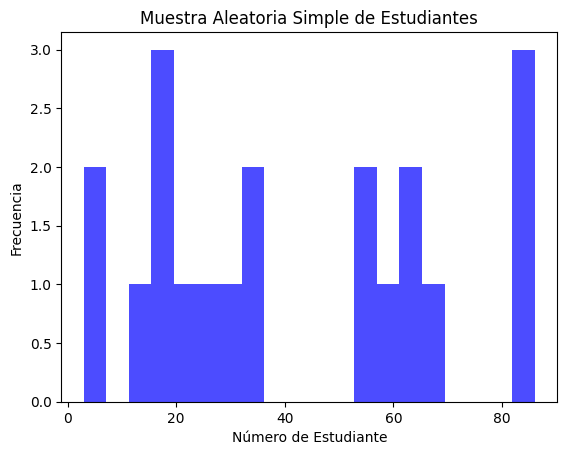

Muestra Aleatoria Simple: [53 59  3 62 19  5 67 17 21 82 12 36 65 18 34 32 86 84 55 24]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Población total de estudiantes (100 en total)
population = np.arange(1, 101)

# Tamaño de la muestra
sample_size = 20

# Realizar el muestreo aleatorio simple
random_sample = np.random.choice(population, size=sample_size, replace=False)

# Crear un histograma para visualizar los datos de la muestra
plt.hist(random_sample, bins=20, color='blue', alpha=0.7)
plt.xlabel('Número de Estudiante')
plt.ylabel('Frecuencia')
plt.title('Muestra Aleatoria Simple de Estudiantes')
plt.show()

print("Muestra Aleatoria Simple:", random_sample)

**Interpretación del Gráfico:**

En este gráfico de histograma, se muestra la distribución de los números de estudiante en la muestra aleatoria simple. Como se seleccionaron al azar, todos los números de estudiante tienen la misma probabilidad de aparecer en la muestra. Esto resulta en una distribución uniforme en el gráfico.

**Usos y Consideraciones:**

- El muestreo aleatorio simple es útil cuando se desea obtener una muestra representativa de una población grande.
- Garantiza que todos los subconjuntos posibles tengan la misma probabilidad de ser seleccionados, lo que minimiza el sesgo en los resultados.
- Puede ser implementado utilizando generadores de números aleatorios en bibliotecas como NumPy en Python.

En resumen, el muestreo aleatorio simple es una técnica fundamental en estadísticas y ciencia de datos para obtener muestras representativas de una población. La distribución uniforme de los elementos en la muestra resulta en resultados más confiables y generalizables.

## **Muestreo Sistemático**

El muestreo sistemático es una técnica de selección de muestra en la que los elementos de una población se seleccionan siguiendo un patrón sistemático predefinido. En esta técnica, se elige un punto de partida aleatorio y luego se selecciona cada "k-ésimo" elemento después de ese punto. Aunque menos aleatorio que el muestreo aleatorio simple, el muestreo sistemático sigue siendo una técnica útil para obtener muestras representativas de poblaciones grandes. Aquí tienes una explicación detallada y un ejemplo con gráficos.

**Explicación:**

En el muestreo sistemático, los elementos de la población se seleccionan siguiendo un patrón sistemático. Primero, se elige un punto de partida aleatorio dentro de la población. Luego, se selecciona cada "k-ésimo" elemento después de ese punto de partida. Esta técnica asegura que todos los elementos tengan una probabilidad igual de ser seleccionados y, al mismo tiempo, es más eficiente que el muestreo aleatorio simple cuando la población es grande y no es práctico seleccionar cada elemento de manera individual.

**Ejemplo:**

Supongamos que tienes una población de 100 estudiantes universitarios y deseas seleccionar una muestra sistemática de 20 estudiantes para realizar una encuesta sobre sus hábitos de estudio.

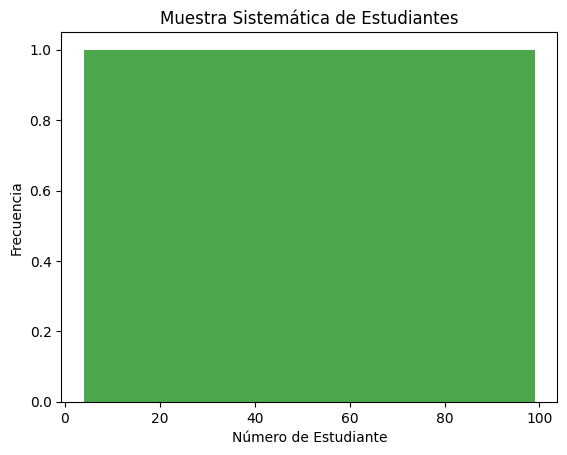

Muestra Sistemática: [ 4  9 14 19 24 29 34 39 44 49 54 59 64 69 74 79 84 89 94 99]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Población total de estudiantes (100 en total)
population = np.arange(1, 101)

# Tamaño de la muestra
sample_size = 20

# Paso sistemático para seleccionar cada k-ésimo elemento
k = len(population) // sample_size

# Punto de partida aleatorio
start_point = np.random.randint(0, k)

# Realizar el muestreo sistemático
systematic_sample = population[start_point::k]

# Crear un histograma para visualizar los datos de la muestra
plt.hist(systematic_sample, bins=20, color='green', alpha=0.7)
plt.xlabel('Número de Estudiante')
plt.ylabel('Frecuencia')
plt.title('Muestra Sistemática de Estudiantes')
plt.show()

print("Muestra Sistemática:", systematic_sample)

**Interpretación del Gráfico:**

En este gráfico de histograma, se muestra la distribución de los números de estudiante en la muestra sistemática. Aunque no es completamente aleatorio, la selección sistemática garantiza que cada k-ésimo estudiante sea seleccionado, lo que mantiene la representatividad en la muestra.

**Usos y Consideraciones:**

- El muestreo sistemático es útil cuando se necesita una muestra representativa de una población grande y no es posible realizar un muestreo aleatorio simple.
- Puede ser más eficiente que el muestreo aleatorio simple en términos de tiempo y recursos.
- La elección del paso k es importante para garantizar que la muestra sea realmente representativa.

En resumen, el muestreo sistemático es una técnica intermedia entre el muestreo aleatorio simple y el muestreo por conveniencia. Aunque menos aleatorio que el primero, sigue siendo una técnica valiosa para obtener muestras representativas en situaciones en las que el muestreo aleatorio simple no es práctico.

## **Muestreo Estratificado**

El muestreo estratificado es una técnica de selección de muestra en la que la población se divide en subgrupos homogéneos llamados estratos, y luego se selecciona una muestra aleatoria de cada estrato. Esta técnica es especialmente útil cuando la población es heterogénea y contiene subgrupos con características diferentes. El muestreo estratificado garantiza que cada subgrupo esté representado en la muestra, lo que mejora la precisión de los resultados. Aquí tienes una explicación detallada y un ejemplo con gráficos.

**Explicación:**

El muestreo estratificado se basa en dividir la población en estratos o subgrupos que tengan características similares. Luego, se selecciona una muestra aleatoria de cada estrato, lo que garantiza que cada subgrupo esté representado en la muestra final. Esto es especialmente útil cuando hay variabilidad significativa entre los subgrupos y se quiere asegurar que todos los grupos estén representados en proporciones adecuadas.

**Ejemplo:**

Supongamos que estás realizando una encuesta sobre el rendimiento académico de estudiantes universitarios y sabes que la población se divide en tres estratos según los grados (primer año, segundo año y tercer año). Quieres seleccionar una muestra estratificada de 30 estudiantes en total, asignando proporciones iguales a cada estrato.

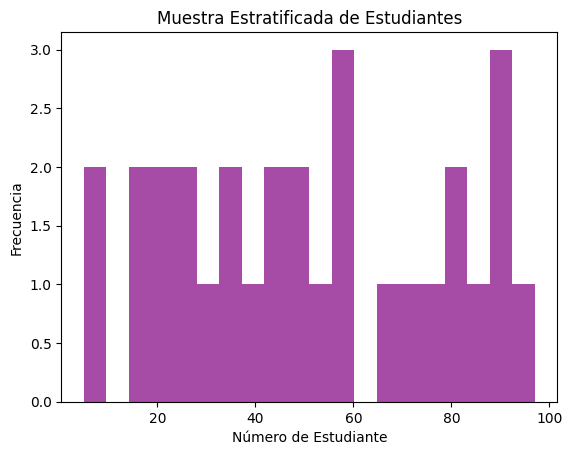

Muestra Estratificada: [27, 34, 20, 25, 18, 5, 30, 17, 21, 6, 49, 48, 55, 35, 60, 45, 58, 56, 39, 44, 90, 97, 75, 92, 70, 82, 83, 91, 68, 85]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Población total de estudiantes (100 en total)
population = np.arange(1, 101)

# Tamaño de la muestra total
sample_size = 30

# Número de estratos
num_strata = 3

# Dividir la población en estratos
strata = np.array_split(population, num_strata)

# Tamaño de muestra por estrato
stratum_sample_size = sample_size // num_strata

# Realizar muestreo aleatorio en cada estrato
stratified_sample = []
for s in strata:
    stratum_sample = np.random.choice(s, size=stratum_sample_size, replace=False)
    stratified_sample.extend(stratum_sample)

# Crear un histograma para visualizar los datos de la muestra
plt.hist(stratified_sample, bins=20, color='purple', alpha=0.7)
plt.xlabel('Número de Estudiante')
plt.ylabel('Frecuencia')
plt.title('Muestra Estratificada de Estudiantes')
plt.show()

print("Muestra Estratificada:", stratified_sample)

**Interpretación del Gráfico:**

En este gráfico de histograma, se muestra la distribución de los números de estudiante en la muestra estratificada. Como se seleccionó una muestra de cada estrato, se garantiza que cada subgrupo esté representado.

**Usos y Consideraciones:**

- El muestreo estratificado es útil cuando la población contiene subgrupos con características diferentes y se quiere asegurar que todos los grupos estén representados.
- Mejora la precisión de los resultados al garantizar una muestra proporcional de cada estrato.
- Se debe decidir el número de estratos y el tamaño de muestra en cada estrato de acuerdo con los objetivos del estudio y la variabilidad de la población.

En resumen, el muestreo estratificado es una técnica poderosa para garantizar una representación precisa de diferentes subgrupos dentro de una población. Es especialmente útil en situaciones en las que los subgrupos tienen diferencias significativas en sus características o comportamientos.

## **Muestreo por Conglomerados o Clusters**

El muestreo por conglomerados, también conocido como muestreo por grupos o clusters, es una técnica de selección de muestra en la que la población se divide en grupos más grandes llamados conglomerados. Luego, se seleccionan algunos conglomerados al azar y se toma una muestra de cada conglomerado seleccionado. Esta técnica es útil cuando no es práctico o económicamente viable seleccionar elementos individuales de la población. Aquí tienes una explicación detallada y un ejemplo con gráficos.

**Explicación:**

En el muestreo por conglomerados, la población se divide en grupos más grandes o conglomerados, en lugar de seleccionar elementos individuales. Luego, se seleccionan algunos conglomerados al azar y se toma una muestra de cada conglomerado seleccionado. Esta técnica es útil cuando la población es heterogénea y es más fácil acceder a los conglomerados que a los elementos individuales.

**Ejemplo:**

Supongamos que estás realizando una encuesta sobre el consumo de energía en diferentes vecindarios de una ciudad. En lugar de encuestar a cada hogar individualmente, decides seleccionar al azar cinco vecindarios y luego encuestar a 10 hogares en cada vecindario seleccionado.

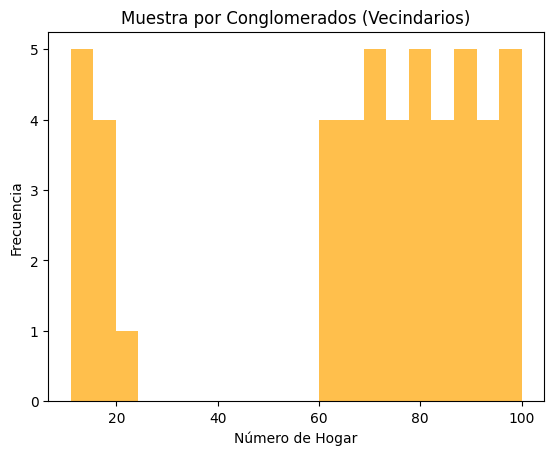

Muestra por Conglomerados: [91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Número total de vecindarios (conglomerados)
total_clusters = 10

# Número de hogares en cada vecindario (conglomerado)
households_per_cluster = 10

# Población total de hogares
total_households = total_clusters * households_per_cluster

# Seleccionar al azar algunos vecindarios
selected_clusters = np.random.choice(np.arange(1, total_clusters + 1), size=5, replace=False)

# Crear una muestra de hogares en cada vecindario seleccionado
cluster_sample = []
for cluster in selected_clusters:
    cluster_households = np.arange((cluster - 1) * households_per_cluster + 1, cluster * households_per_cluster + 1)
    cluster_sample.extend(cluster_households)

# Crear un histograma para visualizar los datos de la muestra
plt.hist(cluster_sample, bins=20, color='orange', alpha=0.7)
plt.xlabel('Número de Hogar')
plt.ylabel('Frecuencia')
plt.title('Muestra por Conglomerados (Vecindarios)')
plt.show()

print("Muestra por Conglomerados:", cluster_sample)

**Interpretación del Gráfico:**

En este gráfico de histograma, se muestra la distribución de los números de hogar en la muestra por conglomerados. Como se seleccionaron al azar algunos vecindarios y se encuestaron varios hogares en cada vecindario, la muestra final consiste en hogares de diferentes vecindarios.

**Usos y Consideraciones:**

- El muestreo por conglomerados es útil cuando la población es grande y dispersa, y es más práctico seleccionar grupos enteros en lugar de elementos individuales.
- Puede reducir los costos y la carga de trabajo al seleccionar y encuestar conglomerados en lugar de elementos individuales.
- Los conglomerados deben ser heterogéneos entre sí y representativos de la población.

En resumen, el muestreo por conglomerados es una técnica eficiente para encuestar poblaciones grandes y dispersas, utilizando grupos más grandes en lugar de elementos individuales. La elección adecuada de los conglomerados y su representatividad son esenciales para obtener resultados confiables y generalizables.

## **Muestreo con Python**

El muestreo en Python es el proceso de seleccionar un subconjunto de elementos de una población más grande para realizar análisis y obtener conclusiones sobre la población en su conjunto. Python ofrece diversas bibliotecas y funciones que facilitan la implementación de diferentes técnicas de muestreo, como el muestreo aleatorio simple, el muestreo estratificado, el muestreo sistemático y más. A continuación, te proporcionaré ejemplos y gráficos para ilustrar algunas de estas técnicas de muestreo utilizando la biblioteca NumPy.

**Muestreo Aleatorio Simple:**

El muestreo aleatorio simple implica seleccionar elementos de la población de manera aleatoria y con igual probabilidad.

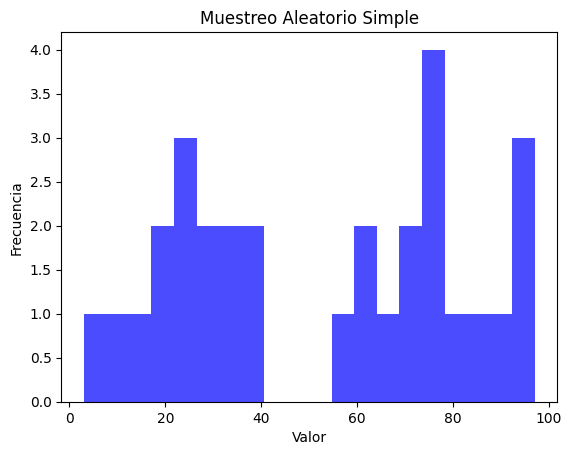

Muestra Aleatoria Simple: [12 77 29 74 36 17  3 65 59 72 23 97 70 22 93 87 21 61 25 33 76 31 19 88
 63 37 75 96 35 81]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Población de ejemplo (números del 1 al 100)
population = np.arange(1, 101)

# Tamaño de la muestra
sample_size = 30

# Realizar el muestreo aleatorio simple
random_sample = np.random.choice(population, size=sample_size, replace=False)

# Crear un histograma para visualizar los datos de la muestra
plt.hist(random_sample, bins=20, color='blue', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Muestreo Aleatorio Simple')
plt.show()

print("Muestra Aleatoria Simple:", random_sample)

**Muestreo Estratificado:**

El muestreo estratificado implica dividir la población en subgrupos (estratos) y seleccionar una muestra de cada estrato.

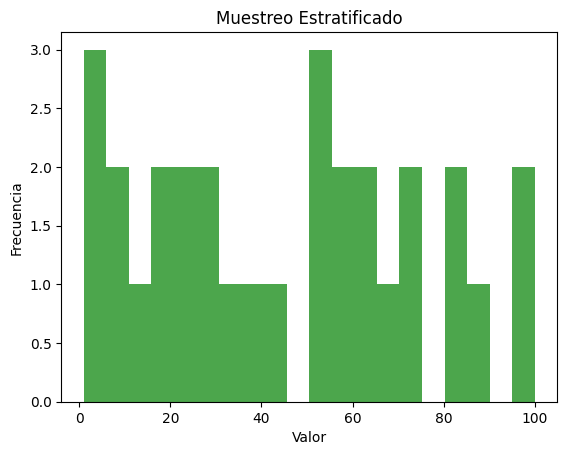

Muestra Estratificada: [  7  30  21  32   5  11   9  22  27   1   4  19  43  18  38  75  70  87
  52  58 100  72  63  61  57  85  83  99  51  53]


In [13]:

# Dividir la población en dos estratos
stratum_1 = np.arange(1, 51)
stratum_2 = np.arange(51, 101)

# Tamaño de muestra por estrato
stratum_sample_size = sample_size // 2

# Realizar muestreo aleatorio en cada estrato
sample_stratum_1 = np.random.choice(stratum_1, size=stratum_sample_size, replace=False)
sample_stratum_2 = np.random.choice(stratum_2, size=stratum_sample_size, replace=False)

# Combinar las muestras de los estratos
stratified_sample = np.concatenate([sample_stratum_1, sample_stratum_2])

# Crear un histograma para visualizar los datos de la muestra estratificada
plt.hist(stratified_sample, bins=20, color='green', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Muestreo Estratificado')
plt.show()

print("Muestra Estratificada:", stratified_sample)

**Muestreo Sistemático:**

El muestreo sistemático implica seleccionar elementos cada "k-ésimo" elemento después de un punto de partida.

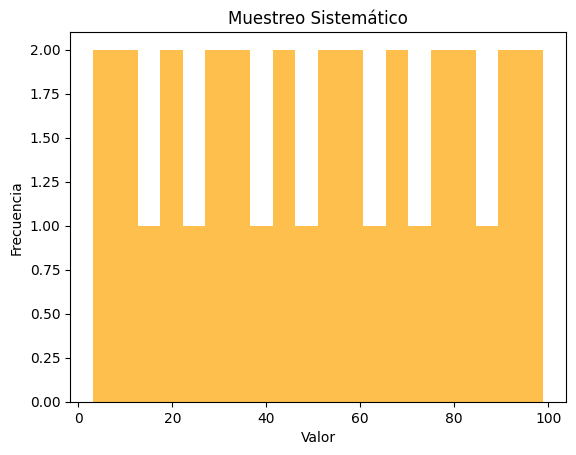

Muestra Sistemática: [ 3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72
 75 78 81 84 87 90 93 96 99]


In [14]:
# Paso sistemático para seleccionar cada k-ésimo elemento
k = len(population) // sample_size

# Punto de partida aleatorio
start_point = np.random.randint(0, k)

# Realizar el muestreo sistemático
systematic_sample = population[start_point::k]

# Crear un histograma para visualizar los datos de la muestra sistemática
plt.hist(systematic_sample, bins=20, color='orange', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Muestreo Sistemático')
plt.show()

print("Muestra Sistemática:", systematic_sample)

**Muestreo por Conglomerados:**

El muestreo por conglomerados implica seleccionar grupos (conglomerados) al azar y luego tomar una muestra de cada conglomerado.

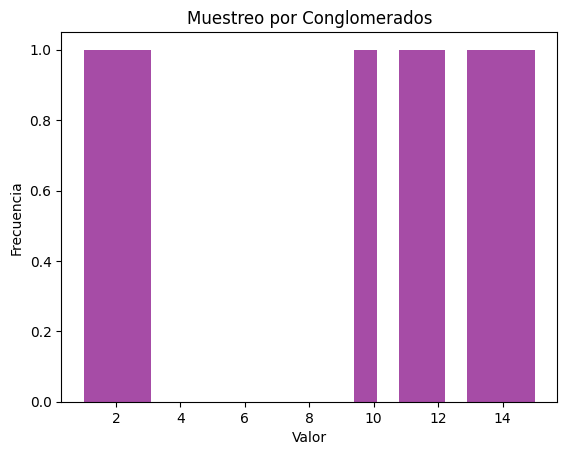

Muestra por Conglomerados: [10, 11, 12, 1, 2, 3, 13, 14, 15]


In [15]:

# Número total de conglomerados
total_clusters = 10

# Tamaño de muestra por conglomerado
cluster_sample_size = 3

# Seleccionar al azar algunos conglomerados
selected_clusters = np.random.choice(np.arange(1, total_clusters + 1), size=3, replace=False)

# Crear una muestra de elementos en cada conglomerado seleccionado
cluster_sample = []
for cluster in selected_clusters:
    cluster_elements = np.arange((cluster - 1) * cluster_sample_size + 1, cluster * cluster_sample_size + 1)
    cluster_sample.extend(cluster_elements)

# Crear un histograma para visualizar los datos de la muestra por conglomerados
plt.hist(cluster_sample, bins=20, color='purple', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Muestreo por Conglomerados')
plt.show()

print("Muestra por Conglomerados:", cluster_sample)

Estos ejemplos ilustran cómo implementar diferentes técnicas de muestreo en Python utilizando la biblioteca NumPy y cómo visualizar los resultados utilizando gráficos de histograma. Dependiendo de la técnica de muestreo utilizada y los objetivos del estudio, puedes adaptar y combinar estas técnicas para obtener una muestra representativa de la población en tu análisis.

## **Método Sample de Pandas**

En la biblioteca de Python, Pandas, el método `sample()` se utiliza para realizar un muestreo aleatorio de los datos en un DataFrame. Este método permite seleccionar aleatoriamente una cantidad específica de filas (muestras) del DataFrame original. La función `sample()` ofrece flexibilidad para controlar el tamaño de la muestra, si permitir reemplazos, y si se desea obtener una muestra de una fracción de los datos. A continuación, te proporcionaré una explicación detallada junto con ejemplos y gráficos para ilustrar cómo usar el método `sample()` en Pandas.

**Explicación:**

El método `sample()` en Pandas permite realizar muestreo aleatorio de los datos en un DataFrame. Puede ser útil en situaciones donde tienes un conjunto de datos grande y deseas obtener una muestra representativa para realizar análisis exploratorios o pruebas. El método `sample()` acepta varios parámetros para personalizar el proceso de muestreo.

**Ejemplo:**

Supongamos que tenemos un DataFrame que contiene información sobre estudiantes y sus calificaciones en diferentes asignaturas.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Ana', 'Juan', 'María', 'Carlos', 'Luis', 'Laura', 'David', 'Sofía', 'Pedro', 'Elena'],
    'Matemáticas': np.random.randint(50, 100, size=10),
    'Historia': np.random.randint(50, 100, size=10),
    'Ciencias': np.random.randint(50, 100, size=10)
}

df = pd.DataFrame(data)

# Realizar un muestreo aleatorio de 5 estudiantes
sample = df.sample(n=5, random_state=42)

print("Muestra Aleatoria:")
print(sample)

Muestra Aleatoria:
  Nombre  Matemáticas  Historia  Ciencias
8  Pedro           93        78        99
1   Juan           66        63        76
5  Laura           67        54        86
0    Ana           69        80        93
7  Sofía           76        55        52


**Interpretación:**

En este ejemplo, utilizamos el método `sample()` para seleccionar aleatoriamente 5 filas (estudiantes) del DataFrame `df`. El argumento `n` se establece en 5 para indicar el tamaño de la muestra. El argumento `random_state` se establece para reproducir los mismos resultados en ejecuciones posteriores.

**Creación de Gráficos:**

Para ilustrar el proceso de muestreo, podemos visualizar las calificaciones en diferentes asignaturas para la muestra y compararlas con el conjunto de datos original.

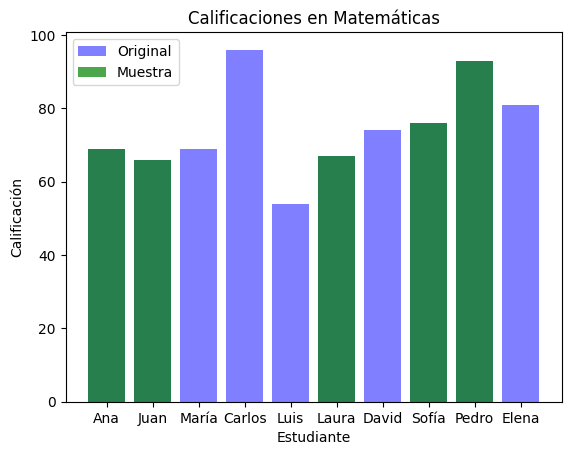

In [17]:
# Crear un gráfico de barras para las calificaciones de Matemáticas
plt.bar(df['Nombre'], df['Matemáticas'], color='blue', alpha=0.5, label='Original')
plt.bar(sample['Nombre'], sample['Matemáticas'], color='green', alpha=0.7, label='Muestra')
plt.xlabel('Estudiante')
plt.ylabel('Calificación')
plt.title('Calificaciones en Matemáticas')
plt.legend()
plt.show()

**Interpretación del Gráfico:**

En este gráfico de barras, comparamos las calificaciones en Matemáticas entre el DataFrame original y la muestra aleatoria seleccionada. Las barras azules representan las calificaciones originales, mientras que las barras verdes representan las calificaciones en la muestra.

**Usos y Consideraciones:**

- El método `sample()` en Pandas es útil para obtener una muestra aleatoria de los datos y realizar análisis exploratorios.
- Puedes controlar el tamaño de la muestra utilizando el argumento `n` y permitir reemplazos utilizando el argumento `replace`.
- También puedes obtener una muestra de una fracción de los datos utilizando el argumento `frac`.

En resumen, el método `sample()` en Pandas es una herramienta útil para realizar muestreo aleatorio en conjuntos de datos y obtener muestras representativas para análisis y exploración de datos.

## **Función Choice de Numpy**

La función `numpy.random.choice()` es una función de la biblioteca NumPy que se utiliza para realizar selecciones aleatorias de elementos de un arreglo o secuencia. Puedes usar esta función para crear muestras aleatorias de elementos con o sin reemplazo. La función `choice()` es muy útil para implementar técnicas de muestreo en análisis de datos y simulaciones. Aquí tienes una explicación detallada junto con ejemplos y gráficos para ilustrar cómo funciona la función `choice()` en NumPy.

**Explicación:**

La función `numpy.random.choice()` permite realizar selecciones aleatorias de elementos de una secuencia. Puedes especificar la secuencia de la cual deseas tomar muestras, el tamaño de la muestra, si permitir reemplazos y las probabilidades de selección para cada elemento.

**Ejemplo:**

Supongamos que tienes una bolsa con bolas numeradas del 1 al 10 y quieres tomar una muestra aleatoria de 5 bolas sin reemplazo.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Números de las bolas en la bolsa
bolas = np.arange(1, 11)

# Tamaño de la muestra
sample_size = 5

# Realizar el muestreo aleatorio sin reemplazo
sample = np.random.choice(bolas, size=sample_size, replace=False)

print("Muestra Aleatoria:", sample)

Muestra Aleatoria: [4 3 9 5 1]


**Interpretación:**

En este ejemplo, utilizamos la función `choice()` para tomar una muestra aleatoria de 5 bolas de la bolsa sin reemplazo. Esto significa que cada bola se selecciona solo una vez en la muestra.

**Creación de Gráficos:**

Para visualizar el proceso de selección aleatoria, podemos crear un gráfico que muestre las bolas en la bolsa y resalte las bolas seleccionadas en la muestra.

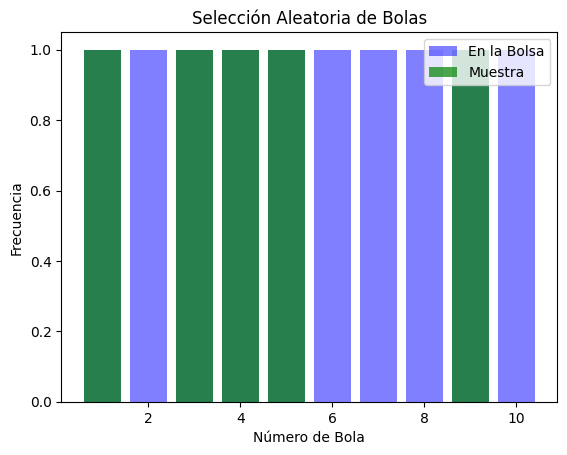

In [19]:
# Crear un gráfico de barras para las bolas en la bolsa
plt.bar(bolas, np.ones_like(bolas), color='blue', alpha=0.5, label='En la Bolsa')

# Resaltar las bolas seleccionadas en la muestra
plt.bar(sample, np.ones_like(sample), color='green', alpha=0.7, label='Muestra')

plt.xlabel('Número de Bola')
plt.ylabel('Frecuencia')
plt.title('Selección Aleatoria de Bolas')
plt.legend()
plt.show()

**Interpretación del Gráfico:**

En este gráfico de barras, mostramos las bolas en la bolsa en azul y resaltamos las bolas seleccionadas en la muestra en verde. Puedes ver qué bolas fueron seleccionadas en la muestra y cómo se distribuyen.

**Usos y Consideraciones:**

- La función `choice()` es útil para implementar técnicas de muestreo en análisis de datos y simulaciones.
- Puedes utilizar el argumento `replace` para controlar si permitir o no reemplazos en la selección.
- Puedes usar el argumento `p` para especificar probabilidades de selección para cada elemento.
- La función `choice()` es versátil y se puede aplicar a una amplia variedad de situaciones, desde muestreo simple hasta generación de datos simulados.

En resumen, la función `numpy.random.choice()` en NumPy es una herramienta esencial para realizar selecciones aleatorias de elementos de secuencias. Puedes utilizarla para implementar diferentes técnicas de muestreo y generar datos aleatorios para análisis y simulaciones.

| **Inicio** | **atrás 18** | **Siguiente 20** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./18_Distribucion_de_Datos.ipynb)| [⏩](./20_Medidas_de_Centralidad.ipynb)|